In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary libraries

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Amazon Books/customer reviews.csv')

In [4]:
dataset.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [5]:
columns_to_keep = ['review title', 'reviewer rating']  # Replace with your column names
filtered_dataset = dataset[columns_to_keep]

In [6]:
filtered_dataset.head()

,review title,reviewer rating
0,Unbelievably impressive. Her torn life on paper.,4
1,What a heartbreaking story,5
2,Britney you are so invincible! You are an insp...,5
3,"Fast Read, Sad Story",5
4,"Buy it, it’s worth the read!",5


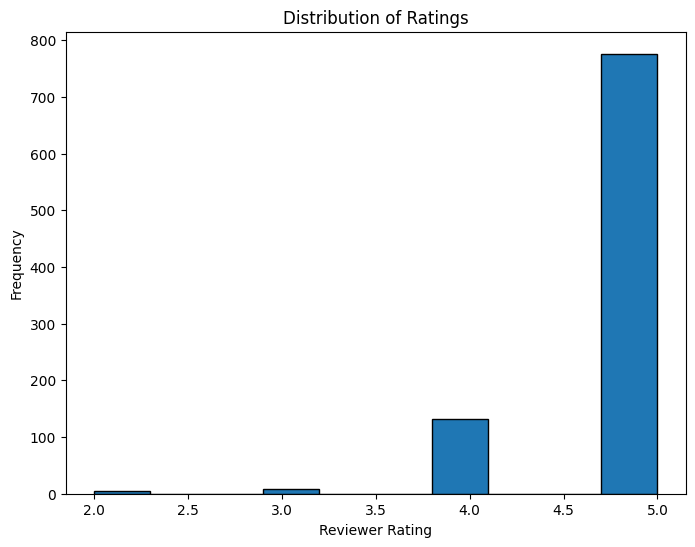

In [78]:
# @title Distribution of Ratings

plt.figure(figsize=(8, 6))
plt.hist(filtered_dataset['reviewer rating'], bins=10, edgecolor='black')
plt.xlabel('Reviewer Rating')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Ratings')

In [7]:
filtered_dataset['reviewer rating'].value_counts()

reviewer rating
5    776
4    132
3      8
2      4
Name: count, dtype: int64

# Preprocessing

In [8]:
!pip install nltk

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

filtered_dataset['preprocessed_text'] = filtered_dataset['review title'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-11-d95aaa7705e3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['preprocessed_text'] = filtered_dataset['review title'].apply(preprocess_text)


In [12]:
filtered_dataset.head()

,review title,reviewer rating,preprocessed_text
0,Unbelievably impressive. Her torn life on paper.,4,unbelievably impressive torn life paper
1,What a heartbreaking story,5,heartbreaking story
2,Britney you are so invincible! You are an insp...,5,britney invincible inspiration helped motivate...
3,"Fast Read, Sad Story",5,fast read sad story
4,"Buy it, it’s worth the read!",5,buy worth read


In [13]:
filtered_dataset.drop('review title', axis=1, inplace=True)

<ipython-input-13-2829132fa2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.drop('review title', axis=1, inplace=True)


In [14]:
filtered_dataset.head()

,reviewer rating,preprocessed_text
0,4,unbelievably impressive torn life paper
1,5,heartbreaking story
2,5,britney invincible inspiration helped motivate...
3,5,fast read sad story
4,5,buy worth read


In [16]:
filtered_dataset.to_csv('/content/drive/MyDrive/Amazon Books/cleaned dataset.csv')

# Feature Extraction TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vect = TfidfVectorizer()

In [19]:
tfidf = vect.fit_transform(filtered_dataset['preprocessed_text'])

In [20]:
tfidf.shape

(920, 1096)

In [21]:
labels = filtered_dataset['reviewer rating']

In [22]:
labels.shape

(920,)

# Resampling with Random Oversampling

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
ro = RandomOverSampler()

In [26]:
X, y = ro.fit_resample(tfidf, labels)

In [27]:
y.value_counts()

reviewer rating
4    776
5    776
3    776
2    776
Name: count, dtype: int64

# Splitting into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Naive-Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
NB = MultinomialNB()

In [32]:
NB.fit(X_train, y_train)

MultinomialNB()

In [56]:
predictions = NB.predict(X_test)

In [57]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.8864734299516909
Precision:  0.8881252195293291
Recall:  0.8899611191277859
F1 Score:  0.8831316797575708


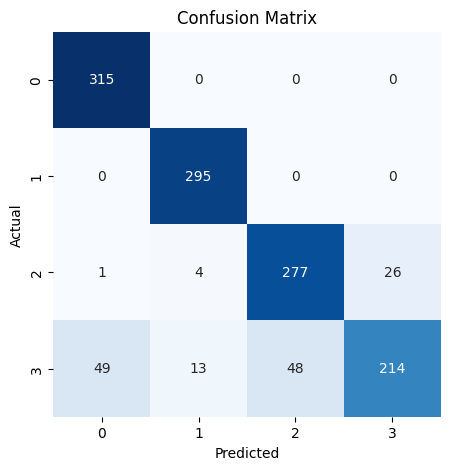

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF = RandomForestClassifier()

In [41]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
predictions = RF.predict(X_test)

In [63]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.9790660225442834
Precision:  0.9794598821123541
Recall:  0.9793771043771043
F1 Score:  0.9794136807817589


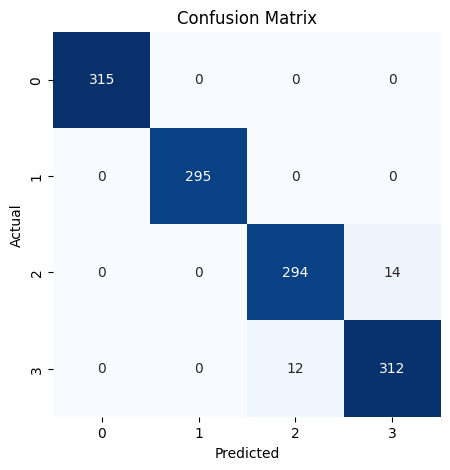

In [64]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# K Nearest Neighbor Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN = KNeighborsClassifier()

In [46]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
predictions = KNN.predict(X_test)

In [66]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.9098228663446055
Precision:  0.9158815963553237
Recall:  0.910333493666827
F1 Score:  0.910374146058226


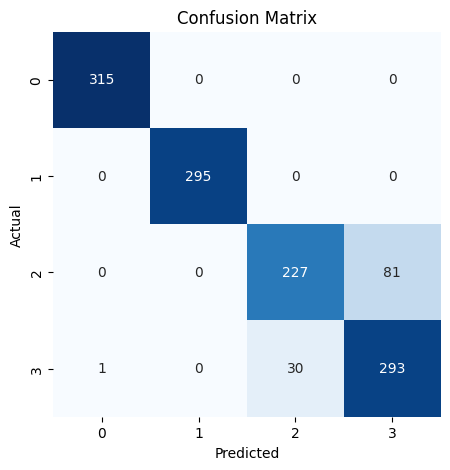

In [67]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DT = DecisionTreeClassifier()

In [51]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
predictions = DT.predict(X_test)

In [69]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.964573268921095
Precision:  0.9652614993664801
Recall:  0.9654882154882155
F1 Score:  0.9651090616843918


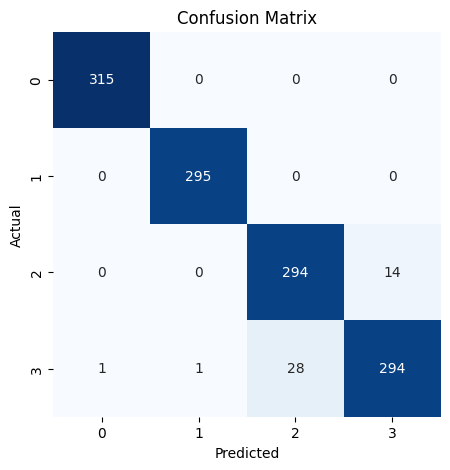

In [70]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Classifier

In [71]:
from sklearn.svm import SVC

In [72]:
svm = SVC()

In [73]:
svm.fit(X_train, y_train)

SVC()

In [74]:
predictions = svm.predict(X_test)

In [76]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='macro'))
print('Recall: ', recall_score(y_test, predictions, average='macro'))
print('F1 Score: ', f1_score(y_test, predictions, average='macro'))

Accuracy:  0.9766505636070854
Precision:  0.9773745317223578
Recall:  0.976861872695206
F1 Score:  0.9770210055692217


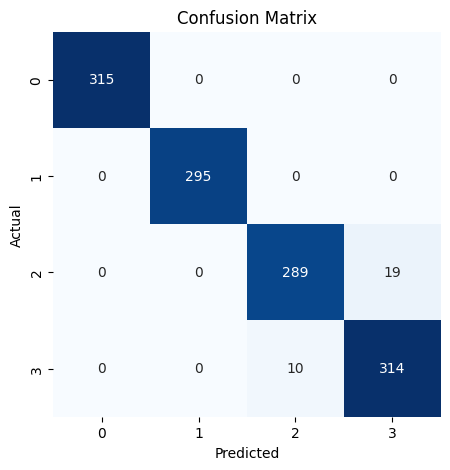

In [75]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()